# Projet SAM -> Classifieur de genre musical

- Reference Paper for CNN: https://www.ijert.org/image-classification-using-hog-and-lbp-feature-descriptors-with-svm-and-cnn
- Reference Tutorial for CNN:
https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
- Reference Tutorial for Transfer Learning: https://keras.io/guides/transfer_learning/
- Keras pre-trained ResNet: https://keras.io/api/applications/#usage-examples-for-image-classification-models

## Classifieur des Images 
#### Partie 1: Regression Logistic & CNN

In [ ]:
import os
import cv2
import pandas as pd
import imutils
from skimage.feature import hog

In [2]:
def get_label_list(msdi_path):
    df = pd.read_csv(msdi_path+'labels.csv', header=None)
    return list(df.iloc[:, 0])

In [ ]:
main_path = "C:/AMU/SAM/Projet/msdi/" #C:\AMU\SAM\Projet\msdi

In [ ]:
entries = pd.read_csv(main_path+"msdi_mapping.csv")

In [ ]:
test = entries[entries['set'] == "test"]
train = entries[entries['set'] == "train"]

In [ ]:
label_list = get_label_list(main_path)
labels = {label_list[i]:i for i in range (0,len(label_list))} # Dictionary Etiquetes Possibles

In [ ]:
labels

### Pre-processing

In [ ]:
# Code for testing

"""
cv2.imshow("teste",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

### Read the Images

In [12]:
def load_img(img_path):
    #img_path = msdi_path+entry['img']
    if os.path.exists(img_path):
        return cv2.imread(img_path)
    else:
        return 0

### Aplly Hog 

In [13]:
def hog_through(image_set, image_labels):
    file_list = []
    for i in range(len(image_set)):
        if i%1000 == 0:
            print("check point:",i)
            
        img = load_img(main_path+image_set[i])

        if img.any():
            
            #resized_img = imutils.resize(img, width=100, height=100)
            fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1),
                            visualize=True,
                            feature_vector=True, channel_axis = 2) # channel_axis = 2 pour les images colores
            #print(i, labels[image_labels[i]])
            
            fd = fd.tolist()
            fd.append(labels[image_labels[i]]) # Make a vector (hogged_image = {h1,h1...hn}+ {image label (0-14)})
            file_list.append(fd)
    return pd.DataFrame.from_records(file_list)
        

### Save Images as Hog Vectors + Label

In [14]:
def save_csv(df, file_name):
    df.to_csv(file_name,index=False)

In [15]:
train_images = list(train['img'])
train_labels = list(train['genre'])

test_images = list(test['img'])
test_labels = list(test['genre'])

In [16]:
train_csv = hog_through(train_images, train_labels)
save_csv(train_csv,"train_hog.csv")

check point: 0
check point: 1000
check point: 2000
check point: 3000
check point: 4000
check point: 5000
check point: 6000
check point: 7000
check point: 8000
check point: 9000
check point: 10000
check point: 11000
check point: 12000
check point: 13000
check point: 14000
check point: 15000
check point: 16000
check point: 17000
check point: 18000
check point: 19000
check point: 20000
check point: 21000


In [17]:
test_csv = hog_through(test_images, test_labels)
save_csv(test_csv,"test_hog.csv")

check point: 0
check point: 1000
check point: 2000
check point: 3000
check point: 4000


### Reading the Data 



In [ ]:
import pandas as pd

In [19]:
def data_label_split(df):
    x = df.iloc[:,0:(len(df.columns)-1)]
    y = df.iloc[:,(len(df.columns)-1):(len(df.columns))]
    return x,y

In [20]:
# (no need to run this if you just run the data processing part, use train_CSV and test_CSV)
train_csv = pd.read_csv("C:/AMU/SAM/Projet/train_hog.csv")
test_csv = pd.read_csv("C:/AMU/SAM/Projet/test_hog.csv")

In [21]:
x_train, y_train = data_label_split(train_csv)
x_test, y_test = data_label_split(test_csv)

In [ ]:
# Remove this later 
"""
x_train = x_train.drop(x_train.columns[[0]], axis=1)
x_test = x_test.drop(x_test.columns[[0]], axis=1)
"""

### Regression Logistique + HOG

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [24]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [25]:
logi = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='multinomial',max_iter=300) #'lbfgs' 'saga'
logi.fit(x_train, y_train.to_numpy().ravel())
logi_predic = logi.predict(x_test)
logi_accu = accuracy_score(y_test.to_numpy().ravel(), logi_predic)

In [26]:
logi_accu

0.20692622069262206

### CNN: 

### Load / Read Images 

In [1]:
import cv2
import pandas as pd
import numpy as np

In [3]:
main_path = "C:/AMU/SAM/Projet/msdi/" #C:\AMU\SAM\Projet\msdi

In [4]:
def load_img(entry, msdi_path):
    return cv2.imread(msdi_path+ entry['img'])

In [5]:
def read_through(entries, main_path):
    X = []
    Y = []
    for i in range(len(entries)):
        
        entry = entries.iloc[i,:]
        img = load_img(entry,main_path)
        
        y = labels[entry["genre"]]
        
        X.append(img)
        Y.append(y)
        
    return X, Y

In [7]:
# WARNING: RUN CELL 2 FOR THIS
label_list = get_label_list(main_path)
labels = {label_list[i]:i for i in range (0,len(label_list))} # Dictionary Etiquetes Possibles

In [8]:
entries = pd.read_csv(main_path+"msdi_mapping.csv")

In [9]:
train = entries[entries['set'] == "train"]
validation = entries[entries['set'] == "val"]
test = entries[entries['set'] == "test"]

In [10]:
x_train, y_train = read_through(train,main_path)
x_test, y_test = read_through(test,main_path)
x_validation, y_validation = read_through(validation,main_path)

#### Convert labels to one-hot

In [11]:
from tensorflow.keras.utils import to_categorical

#one-hot encoding
y_train = to_categorical(y_train, 15)
y_validation = to_categorical(y_validation,15)
y_test = to_categorical(y_test,15)

In [12]:
x_train = np.asarray(x_train, dtype=np.float32)
x_validation = np.asarray(x_validation, dtype=np.float32)
x_test = np.asarray(x_test, dtype=np.float32)

In [ ]:
type( train)

In [15]:
train.shape

(21383, 200, 200, 3)

In [20]:
"""
x_train = train[0:5000]
y_train = y_train[0:5000]
x_validation = validation[0:2000]
y_validation = y_validation[0:2000]
x_test = test[0:1000]
y_test = y_test[0:1000]
"""

In [25]:
y_validation.shape

(2000, 15)

#### Save NP arrays as npz 

In [27]:
np.savez(main_path+"msdi_imgs_as_np",  x_train= x_train, y_train =y_train ,
          x_validation= x_validation,y_validation =y_validation ,
          x_test= x_test,y_test =y_test )

#### Read NP arrays
(run from here if npz file existent)

In [4]:
npzfile = np.load(main_path+"msdi_imgs_as_np_small.npz") # _small train = 5000, val = 2000, test = 1000

In [5]:
npzfile.files

['x_train', 'y_train', 'x_validation', 'y_validation', 'x_test', 'y_test']

##### Don't run this, its just for reference
- x_train = npzfile['x_train']
- x_validation = npzfile['x_validation']
- x_test = npzfile['x_test']

- y_train = npzfile['y_train']
- y_validation = npzfile['y_validation']
- y_test = npzfile['y_test']

#### Todo:
- Run npzation for test and validation
- Save the np arrays so i dont have to load this everytime for fs
- Run the CNN training again with validation step
- Cry over the bad accuracy results
- Do the fine tuning to see if the results get any better

In [6]:
npzfile['x_train'].shape

(5000, 200, 200, 3)

In [ ]:
x_train.shape()

### ResNet 50

- utiliser un réseau ResNet déjà entrainé a
- ajouter une couche de sortie (sigmoïde)
- Exemple d’entrainement : mini-batch de 50 exemples, 90 epochs, learning rate 0.0001, optimiseur Adam


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Initializing ResNet with imagenet weights

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet',input_shape=(200, 200, 3),include_top=False)
# Freeze layers
base_model.trainable = False

In [10]:
# Add to top
inputs = keras.Input(shape=(200, 200, 3))
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier for 15 classes/ labels (Categorical classification)
outputs = keras.layers.Dense(15,activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

#### Compile model and fit

In [31]:
model.compile(optimizer=keras.optimizers.Adam(1e-5), loss=keras.losses.CategoricalCrossentropy(from_logits=False),metrics=[keras.metrics.CategoricalAccuracy()])
history_cnn = model.fit( x_train,y_train,validation_data=(x_validation,y_validation), epochs=20, verbose = 1) #, validation_data=(x_validation,y_validation)

Epoch 1/20
157/157 [==============================] - 515s 3s/step - loss: 2.0692 - categorical_accuracy: 0.4052 - val_loss: 2.1868 - val_categorical_accuracy: 0.3400
Epoch 2/20
157/157 [==============================] - 503s 3s/step - loss: 1.6326 - categorical_accuracy: 0.4886 - val_loss: 2.1881 - val_categorical_accuracy: 0.3630
Epoch 3/20
157/157 [==============================] - 489s 3s/step - loss: 1.4347 - categorical_accuracy: 0.5414 - val_loss: 2.1899 - val_categorical_accuracy: 0.3750
Epoch 4/20
157/157 [==============================] - 487s 3s/step - loss: 1.2965 - categorical_accuracy: 0.5820 - val_loss: 2.3483 - val_categorical_accuracy: 0.3595
Epoch 5/20
157/157 [==============================] - 486s 3s/step - loss: 1.1667 - categorical_accuracy: 0.6220 - val_loss: 2.2003 - val_categorical_accuracy: 0.3445
Epoch 6/20
157/157 [==============================] - 471s 3s/step - loss: 1.0754 - categorical_accuracy: 0.6516 - val_loss: 2.2971 - val_categorical_accuracy: 0.355

In [33]:
model.save_weights('./checkpoints/resnet_checkpoint')

#### Evaluation

In [39]:
np.mean(history_cnn.history["categorical_accuracy"])

0.7127900019288063

In [40]:
history_cnn.history["categorical_accuracy"][19]

0.8641999959945679

In [41]:
results = model.evaluate(x=x_test, y=y_test, batch_size=None, verbose=1, sample_weight=None)

32/32 [==============================] - 72s 2s/step - loss: 2.4000 - categorical_accuracy: 0.4370


In [42]:
print("test loss, test acc:", results)

test loss, test acc: [2.399991512298584, 0.43700000643730164]


In [43]:
results[1]

0.43700000643730164

In [44]:
cnn_accu = results[1]
reg_accu = 0.20692622069262206

#### Fine-Tuning

In [11]:
# Recompile Model to run this
model.load_weights('./checkpoints/resnet_checkpoint') # Transfer Learning trained ResNet

In [12]:
# TODO: Not doing fine-tuning rn due to lack of time (come back here after finishing audio part + bandits (AR))

# Unfreeze base , set 1e-5 as learning rate (avoid overfit)
base_model.trainable = True
model.compile(optimizer=keras.optimizers.Adam(1e-5), loss=keras.losses.CategoricalCrossentropy(from_logits=False),metrics=[keras.metrics.CategoricalAccuracy()])
history_cnn_ft = model.fit(npzfile['x_train'],npzfile['y_train'],validation_data=(npzfile['x_validation'],npzfile['y_validation']), epochs=20, verbose = 1) #, validation_data=(x_validation,y_validation)

Epoch 1/20
157/157 [==============================] - 1606s 10s/step - loss: 244950400.0000 - categorical_accuracy: 0.2212 - val_loss: 7.3246 - val_categorical_accuracy: 0.3215
Epoch 2/20
157/157 [==============================] - 1541s 10s/step - loss: 5.3458 - categorical_accuracy: 0.3934 - val_loss: 2.3711 - val_categorical_accuracy: 0.3540
Epoch 3/20
157/157 [==============================] - 1481s 9s/step - loss: 2.0732 - categorical_accuracy: 0.4466 - val_loss: 2.2387 - val_categorical_accuracy: 0.3540
Epoch 4/20
157/157 [==============================] - 1497s 10s/step - loss: 2.0398 - categorical_accuracy: 0.4470 - val_loss: 2.2653 - val_categorical_accuracy: 0.3540
Epoch 5/20
157/157 [==============================] - 1501s 10s/step - loss: 2.0455 - categorical_accuracy: 0.4470 - val_loss: 2.2364 - val_categorical_accuracy: 0.3540
Epoch 6/20
157/157 [==============================] - 1438s 9s/step - loss: 2.0324 - categorical_accuracy: 0.4470 - val_loss: 2.2342 - val_categoric

In [15]:
model.save_weights('./checkpoints/resnet_ft_checkpoint')

In [18]:
history_cnn_ft.history['categorical_accuracy'][19]

0.44600000977516174

In [16]:
np.mean(history_cnn_ft.history["categorical_accuracy"])

0.4328999973833561

In [20]:
results_ft = model.evaluate(x=npzfile['x_test'], y=npzfile['y_test'], batch_size=None, verbose=1, sample_weight=None) # npzfile['x_test']
print("test loss, test acc:", results_ft)

32/32 [==============================] - 70s 2s/step - loss: 1.8710 - categorical_accuracy: 0.5020
test loss, test acc: [1.871049165725708, 0.5019999742507935]


### Comparison

#### Logistic Regression

| Algorithm | max_iter | Accuracy |
| --- | --- | --- |
| lbfgs | 300 | 0.2069 |
| lbfgs | 500 | 0.1632 |
| lbfgs | 1000 | 0.1503 |
| lbfgs | 3000 | 0.1525 |
| saga | 300 | 0.1595 |
| saga | 1000 | 0.1555 |

#### CNN RestNet50 Train = 5000, Val = 2000, Test = 1000, model pre-trained with imagenet

| Step | Learning Rate | Accuracy | Average Accuracy
| --- | --- | --- | ---|
| Transfer Learning: Trainig |0.001 | 0.8641 |0.712|
| Transfer Learning: Test | - | 0.4370 | -| -
| Fine-Tuning: Training | 1e-5 |0.446| 0.4329|
| Fine-Tuning: Test | - | 0.502 | -| 


In [45]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<BarContainer object of 1 artists>

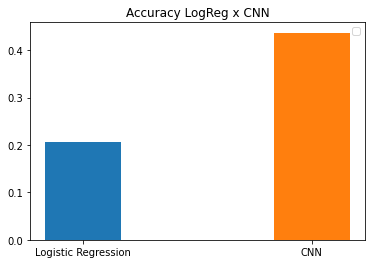

In [46]:
figure = plt.figure()
subplot = figure.add_subplot()

labels = ["Logistic Regression", "CNN"]
x = np.arange(len(labels))
x = [1,4]
subplot.set_xticks(x, labels)
subplot.legend()
subplot.set_title("Accuracy LogReg x CNN")


plt.bar(1, reg_accu, 1)

plt.bar(4, cnn_accu, 1)
